In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
#from sklearn.preprocessing import LabelEncoder
#from scipy import interpolate
import joblib

# Import model data (trained HMM model) 

In [78]:
model_ear = joblib.load('models/EM/hmm_model_ear.pkl')
model_cow = joblib.load('models/EM/hmm_model_cow.pkl')
model_head = joblib.load('models/EM/hmm_model_head.pkl')
model_snout = joblib.load('models/VI/hmm_model_snout.pkl')
model_head_snout = joblib.load('models/VI/hmm_model_head_snout.pkl')

# combining cow and the head_snout

In [79]:

# model_ear and model_head_snout are the outputs of the two existing Gaussian HMMs
# Extract transition and emission probabilities from model_ear and model_head_snout
transition_matrix_combined = (model_cow.transmat_ + model_head_snout.transmat_) / 2  # Averaging transition probabilities
print('transition matrix combined:\n', transition_matrix_combined)
print(len(transition_matrix_combined))
mean_combined = np.concatenate([model_cow.means_, model_head_snout.means_]) / 2  # Averaging means
print('moyenne combined: \n',mean_combined)
covars_combined = np.concatenate([model_cow.covars_, model_head_snout.covars_]) / 2  # Averaging covariances
#print('Convariance combined :\n', covars_combined)

# Create the new HMM using the combined parameters
model_CHS = hmm.GaussianHMM(n_components=4, covariance_type='full')  # Creating a new Gaussian HMM
model_CHS.startprob_ = np.array([1.0 / model_CHS.n_components] * model_CHS.n_components)  # Set startprob_ with equal probabilities
model_CHS.transmat_ = transition_matrix_combined
model_CHS.means_ = mean_combined
model_CHS.covars_ = covars_combined

# Use the new_model for further analysis or inference



transition matrix combined:
 [[9.87332265e-01 3.95668350e-03 7.55957468e-03 1.15147672e-03]
 [2.43048499e-03 9.94586356e-01 2.49717547e-03 4.85983506e-04]
 [2.94676266e-03 2.69082562e-03 9.89257759e-01 5.10465305e-03]
 [7.27235741e-04 3.63864793e-04 2.54833392e-03 9.96360566e-01]]
4
moyenne combined: 
 [[0.03333321 0.0370224  0.40347465 0.64747608]
 [0.08728027 0.01973417 0.47044568 0.50999273]
 [0.13944855 0.04420668 0.32074285 0.69959783]
 [0.14797922 0.04215099 0.42372553 0.68317304]
 [0.08591824 0.24884225 0.08706444 0.12886535]
 [0.17069402 0.24379623 0.08620323 0.10227422]
 [0.49969773 0.39019425 0.06575902 0.08372146]
 [0.2292219  0.29323414 0.19003743 0.32533635]]


100


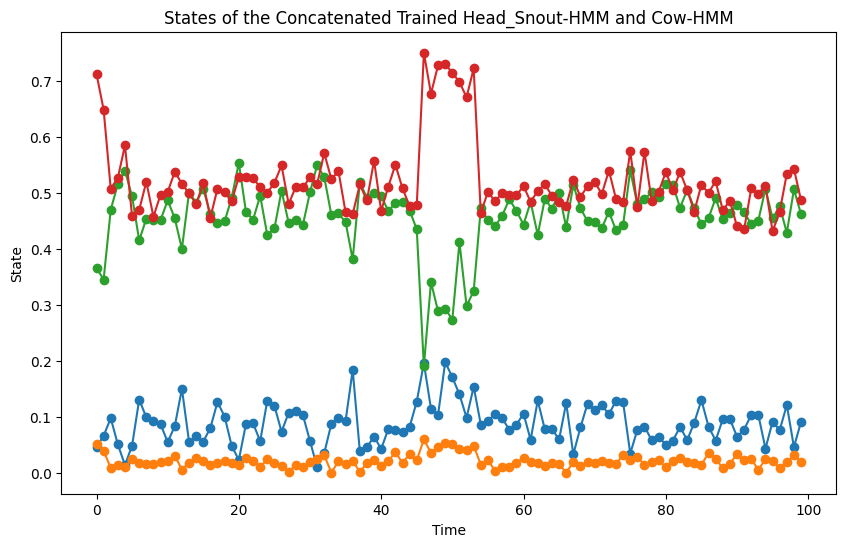

In [98]:
samples, _ = model_CHS.sample(100)
print(len(samples))
# Plot the states 
plt.figure(figsize=(10, 6))
plt.plot(samples, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('States of the Concatenated Trained Head_Snout-HMM and Cow-HMM')
plt.show()

# combining Head and snout

In [81]:


transition_matrix_combined = (model_head.transmat_ + model_snout.transmat_) / 2  
print(f'Matrice de transition du head:\n {model_head.transmat_}')
print(f'Matrice de transition du snout:\n {model_snout.transmat_}')

print('transition matrix combined:\n', transition_matrix_combined)
#print(len(transition_matrix_combined))

mean_combined = np.concatenate([model_head.means_, model_snout.means_]) / 2
#print('moyenne combined: \n',mean_combined)

covars_combined = np.concatenate([model_head.covars_, model_snout.covars_]) / 2 
print('Convariance Head :\n', model_head.covars_)
print('Convariance snout :\n', model_snout.covars_)
#print('Convariance combined :\n', covars_combined)


model_HS = hmm.GaussianHMM(n_components=4, covariance_type='full') 
model_HS.startprob_ = np.array([1.0 / model_HS.n_components] * model_HS.n_components)
model_HS.transmat_ = transition_matrix_combined
model_HS.means_ = mean_combined
model_HS.covars_ = covars_combined



Matrice de transition du head:
 [[9.96109804e-01 0.00000000e+00 4.35837219e-75 3.89019564e-03]
 [0.00000000e+00 9.94089928e-01 3.01070783e-03 2.89936454e-03]
 [1.71594215e-51 7.50735467e-03 9.77305776e-01 1.51868698e-02]
 [5.15117877e-03 3.29292486e-38 5.16184318e-03 9.89686978e-01]]
Matrice de transition du snout:
 [[2.88403732e-03 2.66805503e-03 9.91500170e-01 2.94773745e-03]
 [4.53689366e-04 9.95009412e-01 4.53691876e-04 4.08320720e-03]
 [9.81556321e-01 2.64134158e-03 2.85469994e-03 1.29476371e-02]
 [4.34319217e-04 3.52327194e-03 1.91717547e-03 9.94125233e-01]]
transition matrix combined:
 [[4.99496921e-01 1.33402752e-03 4.95750085e-01 3.41896654e-03]
 [2.26844683e-04 9.94549670e-01 1.73219985e-03 3.49128587e-03]
 [4.90778161e-01 5.07434812e-03 4.90080238e-01 1.40672535e-02]
 [2.79274899e-03 1.76163597e-03 3.53950932e-03 9.91906106e-01]]
Convariance Head :
 [[[ 2.64561965e-03 -1.09321132e-03 -1.19984357e-03 -5.99796298e-04]
  [-1.09321132e-03  2.38331835e-03  1.25387658e-03 -4.42059

100


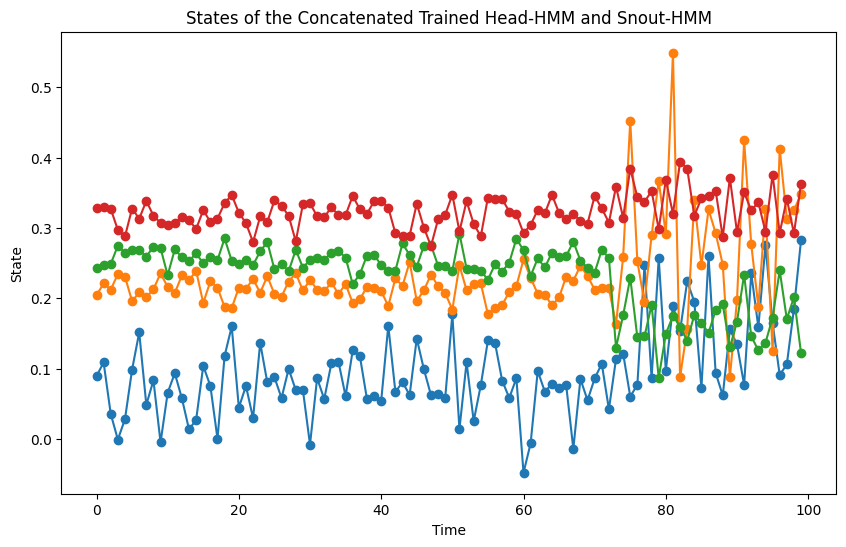

In [112]:

samples, _ = model_HS.sample(100)
print(len(samples))
# Plot the states 
plt.figure(figsize=(10, 6))
plt.plot(samples, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('States of the Concatenated Trained Head-HMM and Snout-HMM')
plt.show()

# 